# EMNIST辨識

## 步驟1：載入 EMNIST

In [1]:
!pip install emnist

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('letters')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('letters')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((124800, 28, 28), (124800,), (20800, 28, 28), (20800,))

## 步驟2：資料探索

In [4]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([23,  7, 16, 15, 23, 17, 13, 11, 22, 24], dtype=uint8)

In [5]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  20, 109, 114,  45,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 114, 245, 253, 214,   5,   0,   0,   0,   0,   0,
         20, 100,  33,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 125, 249, 254, 233,  22,   0,   0,   0,   0,  10,
        123, 238, 163,  33,   0,   0,   0,   0,   2,   4,   4,   0,   0,
          0,   0],
       [  0,   0,   0,  82, 233, 254, 251,  82,   2,   0,   0,   3,  79,
        220, 254, 244, 126,   0,   0,   0,   3,  77, 125, 113,   8,   0,
          0,   0],
       [  

In [6]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000110000000000000000000000',
 '0001111000000000000000000000',
 '0001111100000111100000000000',
 '0001111100001111100001110000',
 '0001111110011111100011111000',
 '0001111110011111110111111100',
 '0001111110111111111111111100',
 '0001111110111111111111111000',
 '0001111111111111111111110000',
 '0011111111111111111111110000',
 '0001111111111111111111100000',
 '0001111111111111111111000000',
 '0001111111111111111110000000',
 '0001111111111111111110000000',
 '0001111111111111111110000000',
 '0001111111110111111110000000',
 '0001111111100111111100000000',
 '0001111111100111111100000000',
 '0001111111000111111100000000',
 '0001111111000111111000000000',
 '0001111111000111111000000000',
 '0001111110000011111000000000',
 '0001111110000011110000000000',
 '0001111110000001100000000000',
 '0001111100000000000000000000',
 '0000111000000000000000000000',
 '0000000000000000000000000000']

In [7]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000011111000000',
 '0000000000000111111111111000',
 '0000000000111111111111111100',
 '0000000111111111111111111100',
 '0000000111111111111111111100',
 '0000001111111111111111111100',
 '0000011111111111111111110000',
 '0000111111111111111111100000',
 '0000111111111111111110000000',
 '0000111111111111111110000000',
 '0001111111111110011110000000',
 '0011111111111111111111110000',
 '0011111111111111111111111000',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111100',
 '0011111111111111111111111000',
 '0011111111111111111111100000',
 '0011111111111111111111000000',
 '0011111111111111111111100000',
 '0011111111111111111111100000',
 '0000111111111111111111000000',
 '0000000111111111111000000000',
 '0000000001111111110000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

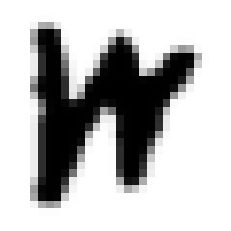

In [8]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='Greys') # gray

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

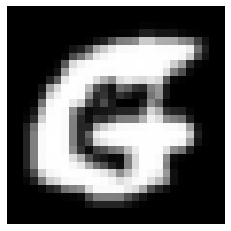

In [9]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [10]:
y_train = y_train -1
y_test = y_test -1

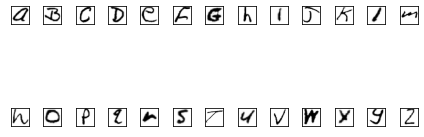

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=13, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(26):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

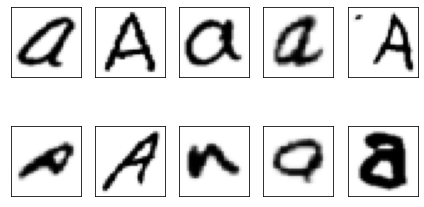

In [12]:
no=0
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [13]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [14]:
# 建立模型
from tensorflow.keras.layers import *
import tensorflow as tf
import numpy as np

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(26, activation='softmax')
# ])

#增加一維在後面
input_shape=(28, 28, 1)

x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer='adam',
              loss=loss, # "mean_squared_error", #'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [16]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 430, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_19668\1060474614.py", line 4, in <cell line: 4>
      history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 25 which is outside the valid range of [0, 10).  Label values: 2 0 25 1 9 6 21 16 17 12 4 25 18 7 12 18 11 24 4 15 17 2 17 22 14 1 3 20 20 2 8 23
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1070]

In [ ]:
# 檢查 history 所有鍵值
history.history.keys()

In [ ]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

In [ ]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [ ]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

In [ ]:
y_test[0:20]

In [ ]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', ' '.join(y_test[0:20].astype(str)))
print('prediction:', ' '.join(predictions[0:20].astype(str)))

In [ ]:
# 顯示第 4 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[3:4])
print(f'0~9預測機率: {np.around(predictions, 2)}')

In [ ]:
# 顯示第 4 筆圖像
X2 = x_test[3,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

In [ ]:
chr(ord('A')+16)

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [ ]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')